In [1]:
%pylab inline
import networkx as nx
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import pickle as pkl

In [4]:
import matplotlib.patches as mpatches
import matplotlib

In [5]:
from subprocess import call

In [6]:
from utils import *

/home/spiaggesi/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.ranking module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
dataset_list = ['contact-high-school', 'contact-primary-school', 'email-Enron']
HASSE_TYPE = 'uniform'
WORK_FOLDER = './'

In [8]:
TUPLE_SIZE = 3

# FIGURE 2 (a)

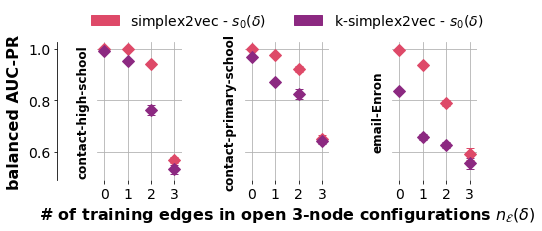

In [9]:
fig, ax = plt.subplots(1, len(dataset_list), figsize=(2.*len(dataset_list), 2.5), facecolor='white', sharey=True, sharex=True)
if len(dataset_list)==1:
    ax=[ax]
fig.tight_layout()
fig.subplots_adjust(wspace=0.75)

cmp = matplotlib.cm.get_cmap('magma_r')
colors = [cmp(i) for i in np.linspace(0.2,0.8,4)][1:]

for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)

    max_order = 1
    
    data_scores = []

    for nlink in range(TUPLE_SIZE+1):

        results_file = load_path+'best-aucpr-reconstruction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                         (nlink, 0, 'cbow', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) 
                       if d['y_test'] is not None else None for d in pred_dict_list]   

        data_scores.append(pred_scores)

    ax[j].errorbar(x=np.arange(TUPLE_SIZE+1),
               y=[np.mean(l) for l in data_scores], 
               yerr=[np.std(l) for l in data_scores],
                color=colors[0], marker='D', linestyle = 'None', markersize=8, capsize=4)


for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)

    max_order = 0
    
    data_scores = []

    for nlink in range(TUPLE_SIZE+1):

        results_file = load_path+'best-aucpr-reconstruction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (nlink, 0, 'sg', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) 
                       if d['y_test'] is not None else None for d in pred_dict_list]   
    
        data_scores.append(pred_scores)

    ax[j].errorbar(x=np.arange(TUPLE_SIZE+1),
               y=[np.mean(l) for l in data_scores], 
               yerr=[np.std(l) for l in data_scores],
                color=colors[1], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    ax[j].set_xticks(list(range(TUPLE_SIZE+1)))

    ax[j].text(-0.25,0.5, dataset, transform=ax[j].transAxes, rotation=90, fontsize=12, weight='bold', va='center')
    
    xmin, xmax = ax[j].get_xbound()
    ax[j].set_xbound(xmin-0.05, xmax+0.05)

    if j==0:
        ax[j].spines['left'].set_position(('outward', 40))

    if j>0:
        ax[j].spines["left"].set_visible(False)
        ax[j].tick_params(axis='y', which='major', left=False)

    ax[j].tick_params(axis='x', which='major', labelsize=14)
    ax[j].tick_params(axis='y', which='major', labelsize=14)
        
    ax[j].grid()
    ax[j].spines["top"].set_visible(False)
    ax[j].spines["right"].set_visible(False)
    ax[j].spines["bottom"].set_visible(False)
    
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xticks([])
plt.yticks([])


ax.set_xlabel('# of training edges in open 3-node configurations'+r" $n_\mathcal{E}(\delta)$", fontsize=16, weight='bold', labelpad=25)
ax.set_ylabel('balanced AUC-PR', fontsize=16, weight='bold', labelpad=75)

legend = ax.legend(*zip(*[(mpatches.Patch(color=c), l) 
                for c,l in zip(colors[:2],['simplex2vec -'+r" $s_0(\delta)$", 'k-simplex2vec -'+r" $s_0(\delta)$"])]),
                bbox_to_anchor=(0.5,1), loc='lower center', ncol=2, fontsize=14, frameon=False)

# FIGURE 2 (b)

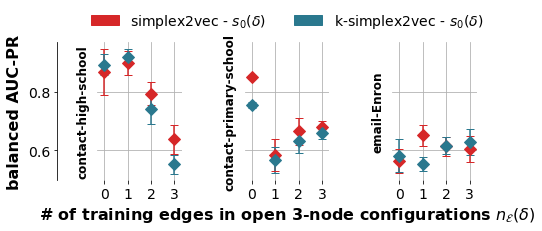

In [10]:
fig, ax = plt.subplots(1, len(dataset_list), figsize=(2.*len(dataset_list), 2.5), facecolor='white', sharey=True, sharex=True)
if len(dataset_list)==1:
    ax=[ax]
fig.tight_layout()
fig.subplots_adjust(wspace=0.75)

cmp = matplotlib.cm.get_cmap('viridis')
colors = ['C3']+[cmp(i) for i in np.linspace(0.2,0.8,4)][1:]


for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)

    max_order = 1
    
    data_scores = []

    for nlink in range(TUPLE_SIZE+1):

        results_file = load_path+'best-aucpr-prediction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                         (nlink, 0, 'cbow', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) 
                       if d['y_test'] is not None else None for d in pred_dict_list]   

        data_scores.append(pred_scores)

    ax[j].errorbar(x=np.arange(TUPLE_SIZE+1),
               y=[np.mean(l) for l in data_scores], 
               yerr=[np.std(l) for l in data_scores],
                color=colors[0], marker='D', linestyle = 'None', markersize=8, capsize=4)


for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)

    max_order = 0
    
    data_scores = []

    for nlink in range(TUPLE_SIZE+1):

        results_file = load_path+'best-aucpr-prediction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (nlink, 0, 'sg', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) 
                       if d['y_test'] is not None else None for d in pred_dict_list]   
    
        data_scores.append(pred_scores)

    ax[j].errorbar(x=np.arange(TUPLE_SIZE+1),
               y=[np.mean(l) for l in data_scores], 
               yerr=[np.std(l) for l in data_scores],
                color=colors[1], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    ax[j].set_xticks(list(range(TUPLE_SIZE+1)))

    ax[j].text(-0.25,0.5, dataset, transform=ax[j].transAxes, rotation=90, fontsize=12, weight='bold', va='center')
    
    xmin, xmax = ax[j].get_xbound()
    ax[j].set_xbound(xmin-0.05, xmax+0.05)

    if j==0:
        ax[j].spines['left'].set_position(('outward', 40))

    if j>0:
        ax[j].spines["left"].set_visible(False)
        ax[j].tick_params(axis='y', which='major', left=False)

    ax[j].tick_params(axis='x', which='major', labelsize=14)
    ax[j].tick_params(axis='y', which='major', labelsize=14)
        
    ax[j].grid()
    ax[j].spines["top"].set_visible(False)
    ax[j].spines["right"].set_visible(False)
    ax[j].spines["bottom"].set_visible(False)
    
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xticks([])
plt.yticks([])

ax.set_xlabel('# of training edges in open 3-node configurations'+r" $n_\mathcal{E}(\delta)$", fontsize=16, weight='bold', labelpad=25)

ax.set_ylabel('balanced AUC-PR', fontsize=16, weight='bold', labelpad=75)

legend = ax.legend(*zip(*[(mpatches.Patch(color=c), l) 
                for c,l in zip(colors[:2],['simplex2vec -'+r" $s_0(\delta)$", 'k-simplex2vec -'+r" $s_0(\delta)$"])]),
                bbox_to_anchor=(0.5,1), loc='lower center', ncol=2, fontsize=14, frameon=False)

# FIGURE 2 (c)

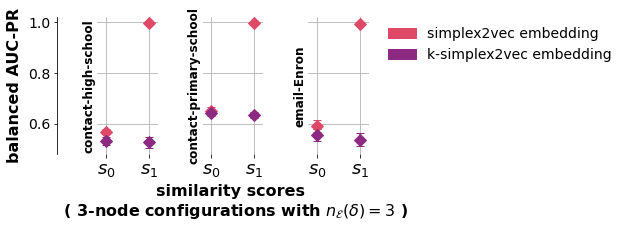

In [11]:
fig, ax = plt.subplots(1, len(dataset_list), figsize=(1.5*len(dataset_list), 2.5), facecolor='white', sharey=True, sharex=True)
if len(dataset_list)==1:
    ax=[ax]
fig.tight_layout()
fig.subplots_adjust(wspace=0.75)

cmp = matplotlib.cm.get_cmap('magma_r')
colors = [cmp(i) for i in np.linspace(0.2,0.8,4)][1:]

for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)
    
    data_scores =  []

    for norder in range(TUPLE_SIZE-1):
        
        max_order = norder+1
        
        results_file = load_path+'best-aucpr-reconstruction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (TUPLE_SIZE, norder, 'cbow', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) if d['y_test'] is not None else None for d in pred_dict_list]  

        data_scores.append(pred_scores)
        
    ax[j].errorbar(x=np.arange(TUPLE_SIZE-1),
           y=[np.mean(l) for l in data_scores], 
           yerr=[np.std(l) for l in data_scores],
            color=colors[0], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)
    
    data_scores =  []

    for norder in range(TUPLE_SIZE-1):
        
        max_order = norder

        results_file = load_path+'best-aucpr-reconstruction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (TUPLE_SIZE, norder, 'sg', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) if d['y_test'] is not None else None for d in pred_dict_list]  

        data_scores.append(pred_scores)
    
    ax[j].errorbar(x=np.arange(TUPLE_SIZE-1),
           y=[np.mean(l) for l in data_scores], 
           yerr=[np.std(l) for l in data_scores],
            color=colors[1], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    ax[j].set_xticks(list(range(TUPLE_SIZE-1)))
    ax[j].set_xticklabels([r"$s_%d$"%(norder) for norder in range(TUPLE_SIZE-1)], fontsize=14)

    ax[j].text(-0.25,0.5, dataset, transform=ax[j].transAxes, rotation=90, fontsize=12, weight='bold', va='center')
    
    xmin, xmax = ax[j].get_xbound()
    ax[j].set_xbound(xmin-0.05, xmax+0.05)

    if j==0:
        ax[j].spines['left'].set_position(('outward', 40))

    if j>0:
        ax[j].spines["left"].set_visible(False)
        ax[j].tick_params(axis='y', which='major', left=False)

    ax[j].tick_params(axis='x', which='major', labelsize=18)
    ax[j].tick_params(axis='y', which='major', labelsize=14)
        
    ax[j].grid()
    ax[j].spines["top"].set_visible(False)
    ax[j].spines["right"].set_visible(False)
    ax[j].spines["bottom"].set_visible(False)
    
ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xticks([])
plt.yticks([])

ax.set_xlabel('similarity scores \n ( 3-node configurations with'+r" $n_\mathcal{E}(\delta)=3$"+' )', fontsize=16, weight='bold', labelpad=30)
    
ax.set_ylabel('balanced AUC-PR', fontsize=16, weight='bold', labelpad=75)

legend = ax.legend(*zip(*[(mpatches.Patch(color=c), l) 
                for c,l in zip(colors[:2],['simplex2vec embedding', 'k-simplex2vec embedding'])]),
               bbox_to_anchor=(1.025, .8), loc = 'center left', ncol=1, fontsize=14, frameon=False)

# FIGURE 2 (d)

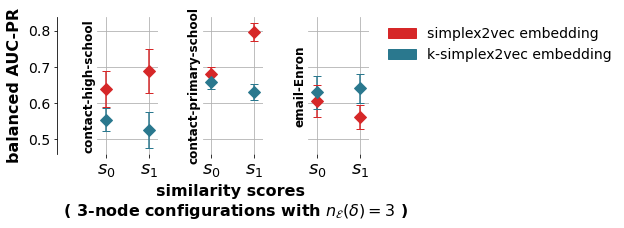

In [12]:
fig, ax = plt.subplots(1, len(dataset_list), figsize=(1.5*len(dataset_list), 2.5), facecolor='white', sharey=True, sharex=True)
if len(dataset_list)==1:
    ax=[ax]
fig.tight_layout()
fig.subplots_adjust(wspace=0.75)

cmp = matplotlib.cm.get_cmap('viridis')
colors = ['C3']+[cmp(i) for i in np.linspace(0.2,0.8,4)][1:]

for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)
    
    data_scores =  []

    for norder in range(TUPLE_SIZE-1):
        
        max_order = norder+1
        
        results_file = load_path+'best-aucpr-prediction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (TUPLE_SIZE, norder, 'cbow', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) if d['y_test'] is not None else None for d in pred_dict_list]  

        data_scores.append(pred_scores)
        
    ax[j].errorbar(x=np.arange(TUPLE_SIZE-1),
           y=[np.mean(l) for l in data_scores], 
           yerr=[np.std(l) for l in data_scores],
            color=colors[0], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    load_path = WORK_FOLDER + 'processed-output/figures/%s/'%(dataset)
    
    data_scores =  []

    for norder in range(TUPLE_SIZE-1):
        
        max_order = norder

        results_file = load_path+'best-aucpr-prediction-%dbounds-%dsimplex-max5000-%s-%s-simplexorder%d-maxorder%d.pkl'%\
                        (TUPLE_SIZE, norder, 'sg', HASSE_TYPE, TUPLE_SIZE-1, max_order)

        pred_dict_list = pkl.load(open(results_file, 'rb'))

        pred_scores = [average_precision(d['y_test'], d['y_pred'], pi0=0.5) if d['y_test'] is not None else None for d in pred_dict_list]  

        data_scores.append(pred_scores)
    
    ax[j].errorbar(x=np.arange(TUPLE_SIZE-1),
           y=[np.mean(l) for l in data_scores], 
           yerr=[np.std(l) for l in data_scores],
            color=colors[1], marker='D', linestyle = 'None', markersize=8, capsize=4)
    
for j, dataset in enumerate(dataset_list):
    
    ax[j].set_xticks(list(range(TUPLE_SIZE-1)))
    ax[j].set_xticklabels([r"$s_%d$"%(norder) for norder in range(TUPLE_SIZE-1)], fontsize=14)

    ax[j].text(-0.25,0.5, dataset, transform=ax[j].transAxes, rotation=90, fontsize=12, weight='bold', va='center')
    
    xmin, xmax = ax[j].get_xbound()
    ax[j].set_xbound(xmin-0.05, xmax+0.05)

    if j==0:
        ax[j].spines['left'].set_position(('outward', 40))

    if j>0:
        ax[j].spines["left"].set_visible(False)
        ax[j].tick_params(axis='y', which='major', left=False)

    ax[j].tick_params(axis='x', which='major', labelsize=18)
    ax[j].tick_params(axis='y', which='major', labelsize=14)
        
    ax[j].grid()
    ax[j].spines["top"].set_visible(False)
    ax[j].spines["right"].set_visible(False)
    ax[j].spines["bottom"].set_visible(False)
    
ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xticks([])
plt.yticks([])

ax.set_xlabel('similarity scores \n ( 3-node configurations with'+r" $n_\mathcal{E}(\delta)=3$"+' )', fontsize=16, weight='bold', labelpad=30)

ax.set_ylabel('balanced AUC-PR', fontsize=16, weight='bold', labelpad=75)

legend = ax.legend(*zip(*[(mpatches.Patch(color=c), l) 
                for c,l in zip(colors[:2],['simplex2vec embedding', 'k-simplex2vec embedding'])]),
               bbox_to_anchor=(1.025, .8), loc = 'center left', ncol=1, fontsize=14, frameon=False)
